## Analyse the results of a Posterior Sampling Routine

- Load data

### Symptoms

- zoom in
- Are there any lambda in lumps ?
- Color samples wrt lump
- Does running average look different ?

### Diagnosis

### Solution

In [578]:
import numpy as np
import random
import os
import matplotlib.pyplot as plt
import pandas as pd
import re
from helper.SimulationJob import SimulationJob
from math import sqrt
from helper.InverseProblem import InverseProblem
from scipy.stats import ks_2samp
import seaborn as sns

In [545]:
dirname = os.path.abspath("experiment-data\\inverse-validation-exp5~multiple\\data")
datafiles = np.array(["experiment-5--synth-data-lmb-2.0-m-0.0-t_horiz-200-nagents-10000.npy--noise-0.1-n_observations-50-num_rounds-6000-burn_in-1000-proposal--0.05-0.05--initial_sample--0.5--0.5--t_horiz-100-nagents-1000-start-27457025-seed-2838994052.npz","experiment-5--synth-data-lmb-2.0-m-0.0-t_horiz-200-nagents-10000.npy--noise-0.1-n_observations-50-num_rounds-6000-burn_in-1000-proposal--0.05-0.05--initial_sample--0.5--0.5--t_horiz-100-nagents-1000-start-27457024-seed-2457933389.npz","experiment-5--synth-data-lmb-2.0-m-0.0-t_horiz-200-nagents-10000.npy--noise-0.1-n_observations-100-num_rounds-6000-burn_in-1000-proposal--0.05-0.05--initial_sample--0.5--0.5--t_horiz-100-nagents-1000-start-27457025-seed-417671792.npz","experiment-5--synth-data-lmb-2.0-m-0.0-t_horiz-200-nagents-10000.npy--noise-0.1-n_observations-50-num_rounds-6000-burn_in-1000-proposal--0.05-0.05--initial_sample--0.5--0.5--t_horiz-100-nagents-1000-start-27457024-seed-874260014.npz","experiment-5--synth-data-lmb-2.0-m-0.0-t_horiz-200-nagents-10000.npy--noise-0.1-n_observations-50-num_rounds-6000-burn_in-1000-proposal--0.05-0.05--initial_sample--0.5--0.5--t_horiz-100-nagents-1000-start-27457025-seed-3887085583.npz","experiment-5--synth-data-lmb-2.0-m-0.0-t_horiz-200-nagents-10000.npy--noise-0.1-n_observations-50-num_rounds-6000-burn_in-1000-proposal--0.05-0.05--initial_sample--0.5--0.5--t_horiz-100-nagents-1000-start-27457025-seed-2243551073.npz","experiment-5--synth-data-lmb-2.0-m-0.0-t_horiz-200-nagents-10000.npy--noise-0.1-n_observations-50-num_rounds-6000-burn_in-1000-proposal--0.05-0.05--initial_sample--0.5--0.5--t_horiz-100-nagents-1000-start-27457024-seed-3129112023.npz","experiment-5--synth-data-lmb-2.0-m-0.0-t_horiz-200-nagents-10000.npy--noise-0.1-n_observations-50-num_rounds-6000-burn_in-1000-proposal--0.05-0.05--initial_sample--0.5--0.5--t_horiz-100-nagents-1000-start-27457025-seed-1040404675.npz","experiment-5--synth-data-lmb-2.0-m-0.0-t_horiz-200-nagents-10000.npy--noise-0.1-n_observations-100-num_rounds-6000-burn_in-1000-proposal--0.05-0.05--initial_sample--0.5--0.5--t_horiz-100-nagents-1000-start-27457025-seed-4113429432.npz","experiment-5--synth-data-lmb-2.0-m-0.0-t_horiz-200-nagents-10000.npy--noise-0.1-n_observations-100-num_rounds-6000-burn_in-1000-proposal--0.05-0.05--initial_sample--0.5--0.5--t_horiz-100-nagents-1000-start-27457025-seed-2967409770.npz","experiment-5--synth-data-lmb-2.0-m-0.0-t_horiz-200-nagents-10000.npy--noise-0.1-n_observations-50-num_rounds-6000-burn_in-1000-proposal--0.05-0.05--initial_sample--0.5--0.5--t_horiz-100-nagents-1000-start-27457025-seed-3646224635.npz","experiment-5--synth-data-lmb-2.0-m-0.0-t_horiz-200-nagents-10000.npy--noise-0.1-n_observations-100-num_rounds-6000-burn_in-1000-proposal--0.05-0.05--initial_sample--0.5--0.5--t_horiz-100-nagents-1000-start-27457025-seed-3985563856.npz","experiment-5--synth-data-lmb-2.0-m-0.0-t_horiz-200-nagents-10000.npy--noise-0.1-n_observations-50-num_rounds-6000-burn_in-1000-proposal--0.05-0.05--initial_sample--0.5--0.5--t_horiz-100-nagents-1000-start-27457025-seed-2051174505.npz","experiment-5--synth-data-lmb-2.0-m-0.0-t_horiz-200-nagents-10000.npy--noise-0.1-n_observations-50-num_rounds-6000-burn_in-1000-proposal--0.05-0.05--initial_sample--0.5--0.5--t_horiz-100-nagents-1000-start-27457025-seed-3737294212.npz","experiment-5--synth-data-lmb-2.0-m-0.0-t_horiz-200-nagents-10000.npy--noise-0.1-n_observations-100-num_rounds-6000-burn_in-1000-proposal--0.05-0.05--initial_sample--0.5--0.5--t_horiz-100-nagents-1000-start-27457025-seed-2282118977.npz","experiment-5--synth-data-lmb-2.0-m-0.0-t_horiz-200-nagents-10000.npy--noise-0.1-n_observations-100-num_rounds-6000-burn_in-1000-proposal--0.05-0.05--initial_sample--0.5--0.5--t_horiz-100-nagents-1000-start-27457025-seed-3924397133.npz","experiment-5--synth-data-lmb-2.0-m-0.0-t_horiz-200-nagents-10000.npy--noise-0.1-n_observations-100-num_rounds-6000-burn_in-1000-proposal--0.05-0.05--initial_sample--0.5--0.5--t_horiz-100-nagents-1000-start-27457025-seed-2677732735.npz","experiment-5--synth-data-lmb-2.0-m-0.0-t_horiz-200-nagents-10000.npy--noise-0.1-n_observations-100-num_rounds-6000-burn_in-1000-proposal--0.05-0.05--initial_sample--0.5--0.5--t_horiz-100-nagents-1000-start-27457025-seed-1166399928.npz","experiment-5--synth-data-lmb-2.0-m-0.0-t_horiz-200-nagents-10000.npy--noise-0.1-n_observations-100-num_rounds-6000-burn_in-1000-proposal--0.05-0.05--initial_sample--0.5--0.5--t_horiz-100-nagents-1000-start-27457025-seed-3386702976.npz","experiment-5--synth-data-lmb-2.0-m-0.0-t_horiz-200-nagents-10000.npy--noise-0.1-n_observations-100-num_rounds-6000-burn_in-1000-proposal--0.05-0.05--initial_sample--0.5--0.5--t_horiz-100-nagents-1000-start-27457025-seed-3247409704.npz"])
#files_to_load = range(0,len(datafiles))
files_to_load = range(0,20)
paths = [os.path.join(dirname,datafiles[i]) for i in files_to_load]
paths

['C:\\Users\\wille\\thesis-repo\\src\\experiment-data\\inverse-validation-exp5~multiple\\data\\experiment-5--synth-data-lmb-2.0-m-0.0-t_horiz-200-nagents-10000.npy--noise-0.1-n_observations-50-num_rounds-6000-burn_in-1000-proposal--0.05-0.05--initial_sample--0.5--0.5--t_horiz-100-nagents-1000-start-27457025-seed-2838994052.npz',
 'C:\\Users\\wille\\thesis-repo\\src\\experiment-data\\inverse-validation-exp5~multiple\\data\\experiment-5--synth-data-lmb-2.0-m-0.0-t_horiz-200-nagents-10000.npy--noise-0.1-n_observations-50-num_rounds-6000-burn_in-1000-proposal--0.05-0.05--initial_sample--0.5--0.5--t_horiz-100-nagents-1000-start-27457024-seed-2457933389.npz',
 'C:\\Users\\wille\\thesis-repo\\src\\experiment-data\\inverse-validation-exp5~multiple\\data\\experiment-5--synth-data-lmb-2.0-m-0.0-t_horiz-200-nagents-10000.npy--noise-0.1-n_observations-100-num_rounds-6000-burn_in-1000-proposal--0.05-0.05--initial_sample--0.5--0.5--t_horiz-100-nagents-1000-start-27457025-seed-417671792.npz',
 'C:\\U

In [546]:
all_data = [np.load(p) for p in paths]

In [547]:
in_research = 18
name = datafiles[in_research]
data = all_data[in_research]
name

'experiment-5--synth-data-lmb-2.0-m-0.0-t_horiz-200-nagents-10000.npy--noise-0.1-n_observations-100-num_rounds-6000-burn_in-1000-proposal--0.05-0.05--initial_sample--0.5--0.5--t_horiz-100-nagents-1000-start-27457025-seed-3386702976.npz'

In [548]:
x = re.search("(?<=--)(.*?)(?=--)", name)
synth_data_name = x.group()
print(synth_data_name)
#y = re.findall("(?<=-)(.*?)(?=[-/.])",synth_data_name)
#print(y)

synth-data-lmb-2.0-m-0.0-t_horiz-200-nagents-10000.npy


In [549]:
data

In [550]:
df = pd.DataFrame.from_dict(dict(data),orient='columns')

In [551]:
df
burnin = 1000
df_postburn = df.loc[burnin:,:]
df_postburn

,lmb,m
1000,2.740764,0.049843
1001,2.740861,0.106286
1002,2.775821,0.098754
1003,2.756672,0.065677
1004,2.756672,0.065677
...,...,...
6996,2.557606,0.109202
6997,2.557606,0.109202
6998,2.561051,0.075246
6999,2.519694,0.089542


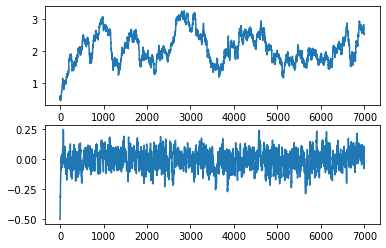

In [552]:
plt.figure(1)
plt.subplot(211)
#plt.scatter(df.index,df['lmb'],marker='x')
plt.plot(df.index,df['lmb'])
plt.subplot(212)
plt.plot(df.index,df['m'])
plt.show()


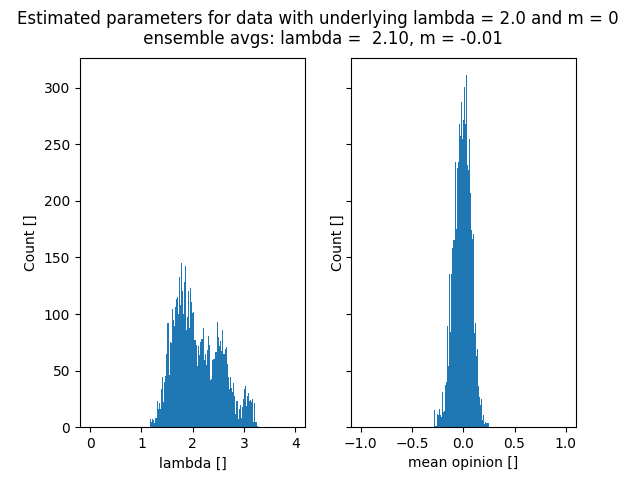

In [553]:
from IPython.display import Image
Image(filename=f"""experiment-data\\inverse-validation-exp5~multiple\\hist-from--{name}-.png""")

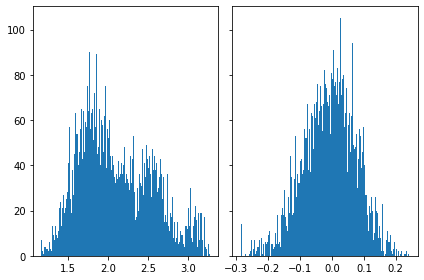

In [554]:
fig, axs = plt.subplots(1, 2, sharey=True, tight_layout=True)
lmb_count, lmb_x, _ = axs[0].hist(df_postburn.loc[:,'lmb'],bins=200)
m_count, m_x, _ = axs[1].hist(df_postburn.loc[:,'m'],bins=200)
plt.show()

In [555]:
m_MAP = float(m_x[np.argmax(m_count)])
lmb_MAP = float(lmb_x[np.argmax(lmb_count)])
print(m_MAP,lmb_MAP)
MAP = dict(m=m_MAP,lmb=lmb_MAP)

0.025797961061297336 1.7693384961915095


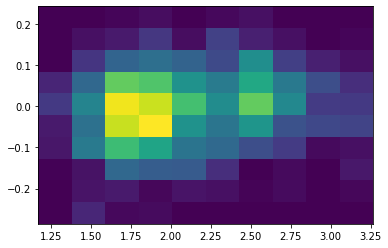

In [573]:
plt.figure()
plt.hist2d(df_postburn.loc[:,'lmb'],df_postburn.loc[:,'m'],density=True)
plt.show()

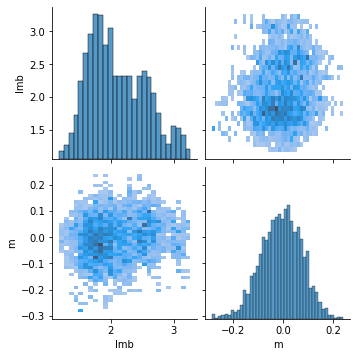

In [582]:
sns.pairplot(df_postburn,kind='hist')
plt.show()

In [556]:
synth_data_path = f"""experiment-data\\{synth_data_name}"""
synth = np.load(synth_data_path)
s_df = pd.DataFrame(synth,columns = ["w"])
s_df

,w
0,-0.210422
1,-0.810868
2,0.780883
3,-0.908357
4,0.560201
...,...
9995,0.877026
9996,-0.305868
9997,0.211145
9998,0.617518


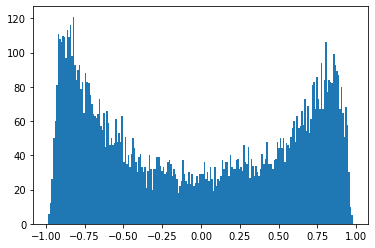

In [557]:
plt.figure(1)
plt.hist(s_df["w"],bins=200)
plt.show()

In [558]:
def generate_invariant(lmb,m):
    gamma = 0.01
    theta_std = sqrt(gamma * lmb)
    assert gamma > 0
    experiment_assumptions = dict(
        free_parameters={"lmb", "m"},
        theta_bound=lambda g, w: (1 - g) / (1 + abs(w)),
        gamma=gamma,
        lmb_bound=(1 / (3 * gamma) - 2 / 3 + gamma / 3),
        p=lambda w: 1,
        d=lambda w: (1 - w ** 2),
        t_horiz=200,
        nagents=10000,
    )

    t_horiz = experiment_assumptions["t_horiz"]
    nagents = experiment_assumptions["nagents"]

    # create synthetic data
    job = SimulationJob(
        gamma,
        theta_std,
        experiment_assumptions["theta_bound"],
        experiment_assumptions["p"],
        experiment_assumptions["d"],
        m,
        t_horiz,
        nagents,
        True,
    )

    job.run()
    return job.result

In [559]:
for combo in [MAP,]:
    combo["w"] = generate_invariant(combo["lmb"],combo["m"])

100%|█████████████████████████████████████████████████████████████████████| 2000000/2000000 [00:57<00:00, 34646.11it/s]


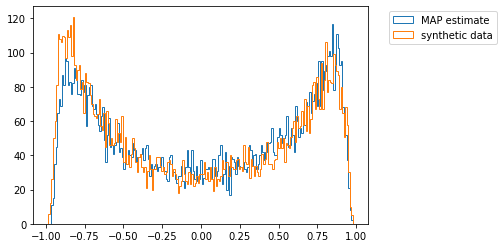

In [560]:
plt.figure(4)
plt.hist(MAP["w"],bins=200,histtype='step',label="MAP estimate")
plt.hist(s_df["w"],bins=200,histtype = 'step',label="synthetic data")
plt.legend(loc='upper right',bbox_to_anchor =(1.4,1))
plt.show()


### Zoom in 

In [561]:
start_index = 1600
end_index = 1700

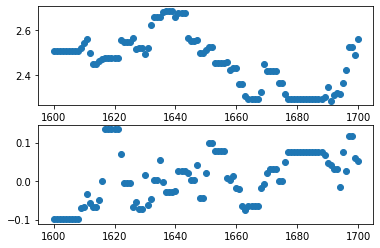

In [562]:
df_zoom = df.loc[start_index:end_index,:]
plt.figure(2)
plt.subplot(211)
plt.scatter(df_zoom.index,df_zoom.loc[:,'lmb'])
plt.subplot(212)
plt.scatter(df_zoom.index,df_zoom.loc[:,'m'])

### Comparison synthetic population vs synthetic sample

In [563]:
def generate_synth_sample(synth_population,n_observations,noise_std,seed=None):
    if seed is None:
        seed = random.randint(1, 2**32 - 1)
    else:
        seed = seed

    random.seed(seed)
    np.random.seed(seed)
    observed_data = synth_population[0:n_observations]
    # add noise
    noise_std = noise_std
    noisy_observed_data = InverseProblem.add_noise(observed_data, noise_std)
    return noisy_observed_data

In [564]:
name

'experiment-5--synth-data-lmb-2.0-m-0.0-t_horiz-200-nagents-10000.npy--noise-0.1-n_observations-100-num_rounds-6000-burn_in-1000-proposal--0.05-0.05--initial_sample--0.5--0.5--t_horiz-100-nagents-1000-start-27457025-seed-3386702976.npz'

In [565]:
seed = int(re.search("(?<=seed-)(.*?)(?=[.])",name).group())
noise = float(re.search("(?<=noise-)(.*?)(?=[-])",name).group())
n_observations = int(re.search("(?<=n_observations-)(.*?)(?=[-])",name).group())

In [566]:
print(seed,noise,n_observations)

3386702976 0.1 100


In [567]:
synth_sample = generate_synth_sample(synth,n_observations,noise,seed)
np.mean(synth)

-0.03593815315022788

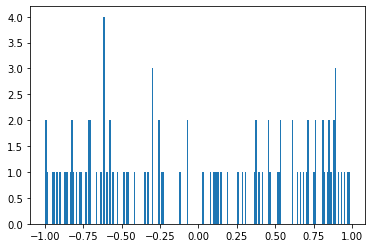

In [568]:
plt.figure(5)
plt.hist(synth_sample,200)
plt.show()

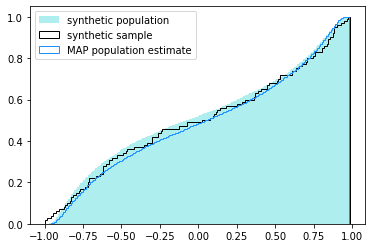

In [569]:
plt.figure(6)
plt.hist(s_df["w"],bins=200,label="synthetic population",cumulative=True,density=True,color='paleturquoise')
plt.hist(synth_sample,histtype = 'step',bins=200,cumulative=True,density=True,label="synthetic sample",color='black')
plt.hist(MAP["w"],bins=200,histtype='step',label="MAP population estimate",cumulative=True,density=True,color='dodgerblue')
plt.legend()
plt.show()

In [570]:
ks_dist_MAP = ks_2samp(MAP["w"],synth_sample)
ks_dist_synth = ks_2samp(s_df["w"],synth_sample)
display(pd.DataFrame(index=["MAP","synth data"],data = [ks_dist_MAP.pvalue,ks_dist_synth.pvalue],columns = ["p-value"]))

,p-value
MAP,0.962192
synth data,0.912887
